In [1]:
# change working directory to the project root
import os
os.chdir('../../')

import sys
sys.path.append('models/utils')
sys.path.append('models/brian2')
sys.path.append('models/aln')

In [2]:
# import python packages
from __future__ import print_function
import os
import datetime
import tqdm
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import scipy 
import pandas as pd
import pypet as pp

# import utils libs
import pypet_parameters as pe
import fitparams as fp
import functions as func
import runModels as rm
import paths

In [3]:
# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = 'plasma'

In [4]:
params = []
params = fp.loadpoint(params, "A2")

params['dt'] = 0.1
params['duration'] =  6000 
params['sigma_ou'] = 0.0

N_neurons = 10000
params['N'] = N_neurons
params['model'] = 'brian'

# Parameter exploration

In [5]:
res = 31
parametrization = pp.cartesian_product({
    'mue_ext_mean':[ round(elem, 3) for elem in np.linspace(0.0, 3.0, res)],
    'mui_ext_mean':[ round(elem, 3) for elem in np.linspace(0.0, 3.0, res)],
    'N' : [1000, 2000, 5000, 10000, 20000]
})
print("{} parameterizations".format(len(parametrization[parametrization.keys()[0]])))

4805 parameterizations


## Run simulations

In [6]:
paths.BRIAN2_COMPILE_DIR = '/mnt/fastio/cakan/brian2_compile/'

In [7]:
paths.HDF_DIR = '/mnt/fastio/cakan/hdf-reviewer-questions'

In [8]:
# ---- initialize pypet environment ----
trajectoryName = 'results' + datetime.datetime.now().strftime("-%Y-%m-%d-%HH-%MM-%SS")
HDF_FILE = os.path.join(paths.HDF_DIR, 'adex-finite-size-bifurcation-diagrams.hdf')
trajectoryFileName = HDF_FILE

import multiprocessing
ncores = multiprocessing.cpu_count()
print("Number of cores: {}".format(ncores))



env = pp.Environment(trajectory=trajectoryName,filename=trajectoryFileName,
                    file_title='adex network bifurcation diagrams with different coupling strengths J',
                    large_overview_tables=True,
                    multiproc=True,           
                    ncores=ncores,
                    wrap_mode='QUEUE',
                    log_stdout = False
                    )

# Get the trajectory from the environment
traj = env.v_trajectory
trajectoryName = traj.v_name

pe.add_parameters(traj, params)

MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `/mnt/fastio/cakan/hdf-reviewer-questions/adex-finite-size-bifurcation-diagrams.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.


Number of cores: 80


In [ ]:
traj.f_explore(parametrization)
env.f_run(rm.runModels_stimulus)
env.f_disable_logging()
print("Done.")

MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2019-12-12-14H-25M-32S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2019-12-12-14H-25M-32S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2019-12-12-14H-25M-32S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2019-12-12-14H-25M-32S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `resu

Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
Simulating 5000 excitatory and 5000 inhibitory 

MainProcess pypet INFO     PROGRESS: Finished  241/4805 runs [=                   ]  5.0%, remaining: 7:25:43


E spikes: 154 I spikes: 513
E spikes: 945 I spikes: 550
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
E spikes: 4350 I spikes: 955
runtime: 723.8
runtime: 687.1
runtime: 103.5
E spikes: 0 I spikes: 19036
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
runtime: 230.1
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
E spikes: 2132 I spikes: 570
runtime: 57.1
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
E spikes: 0 I spikes: 4565
E spikes: 0 I spikes: 13578
runtime: 1056.7
runtime: 355.3
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
E spikes: 0 I spikes: 10248
runtime: 422.6
E spikes: 0 I spikes: 3130
Simulating 10000 excitatory and 10000 inhibi

MainProcess pypet INFO     PROGRESS: Finished  481/4805 runs [==                  ] 10.0%, remaining: 7:39:37


runtime: 175.1
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
E spikes: 0 I spikes: 3743
runtime: 97.0
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
E spikes: 5945 I spikes: 1378
runtime: 505.8
E spikes: 0 I spikes: 3178
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
runtime: 946.3
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
E spikes: 0 I spikes: 24697
runtime: 608.9
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
E spikes: 0 I spikes: 5282
runtime: 58.2
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
E spikes: 0 I spikes: 4424
runtime: 94.7
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
E spikes: 0 I spikes: 15352
runtime: 920.8
Simulating 10000 excitatory an

MainProcess pypet INFO     PROGRESS: Finished  721/4805 runs [===                 ] 15.0%, remaining: 7:43:36


Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
E spikes: 3776 I spikes: 1189
runtime: 89.4
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
E spikes: 751 I spikes: 804
E spikes: 1891 I spikes: 802
runtime: 818.1
runtime: 76.1
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
E spikes: 1378 I spikes: 791
runtime: 50.0
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
E spikes: 0 I spikes: 24723
runtime: 225.3
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
E spikes: 0 I spikes: 1140
E spikes: 0 I spikes: 8806
runtime: 726.9
runtime: 1495.0
E spikes: 397 I spikes: 789
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
runtime: 810

MainProcess pypet INFO     PROGRESS: Finished  961/4805 runs [====                ] 20.0%, remaining: 7:27:00


runtime: 74.4
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
E spikes: 853 I spikes: 1009
runtime: 435.6
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
E spikes: 0 I spikes: 4491
runtime: 1055.7
Simulating 10000 excitatory and 10000 inhibitory neurons (total 20000) ...
E spikes: 0 I spikes: 3814
runtime: 1074.8
E spikes: 1 I spikes: 1082
E spikes: 562 I spikes: 994
runtime: 368.8
Simulating 20000 excitatory and 20000 inhibitory neurons (total 40000) ...
runtime: 431.0
Simulating 1000 excitatory and 1000 inhibitory neurons (total 2000) ...
Simulating 2000 excitatory and 2000 inhibitory neurons (total 4000) ...
E spikes: 10 I spikes: 910
runtime: 405.4
Simulating 5000 excitatory and 5000 inhibitory neurons (total 10000) ...
E spikes: 0 I spikes: 15290
runtime: 1061.3
E spikes: 0 I spikes: 8753
runtime: 77.7
Simulating 10000 excitatory and 10000 inhibitory neurons (to

# Data processing

## Load results from disk

In [15]:
HDF_FILE = os.path.join(paths.HDF_DIR, 'adex-finite-size-bifurcation-diagrams.hdf')
trajectoryFileName = HDF_FILE

In [10]:
# ---- load pypet trajectory "trajectoryFileName" ----
print("Analyzing File \"{}\"".format(trajectoryFileName))
print("All Trajectories:")
print(pe.getTrajectoryNameInsideFile(trajectoryFileName))
trajectoryName = pe.getTrajectoryNameInsideFile(trajectoryFileName)[-1]

print("Analyzing trajectory \"{}\".".format(trajectoryName))
trajLoaded = pp.Trajectory(trajectoryName,add_time=False)
trajLoaded.f_load(trajectoryName,filename=trajectoryFileName, force=True)
trajLoaded.v_auto_load = True
print("{} results found".format(len(trajLoaded.f_get_results())))

MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `/mnt/fastio/cakan/hdf-reviewer-questions/adex-finite-size-bifurcation-diagrams.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2019-12-12-14H-25M-32S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.


Analyzing File "/mnt/fastio/cakan/hdf-reviewer-questions/adex-finite-size-bifurcation-diagrams.hdf"
All Trajectories:
[u'results-2019-12-12-14H-25M-32S']
Analyzing trajectory "results-2019-12-12-14H-25M-32S".


MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.


4805 results found


## Process data

In [11]:
nResults = len(trajLoaded.f_get_run_names()) # number of results in trajectory 
dt = trajLoaded.f_get_parameters()['parameters.simulation.dt'].f_get() # dt of simulation

# ---- explored parameter list ----
exploredParameters = trajLoaded.f_get_explored_parameters()
niceParKeys = [p.split('.')[-1] for p in exploredParameters.keys()]

# ---- lcreate pandas df with results as keys ----
dfResults = pd.DataFrame(columns=niceParKeys,dtype=object)

# range of parameters
for nicep, p in zip(niceParKeys,exploredParameters.keys()):
    dfResults[nicep] = exploredParameters[p].f_get_range()

### Serial Processing

In [12]:
# ---- make a dictionary with results ----
resultDicts = []
makeDict = True

#measures = ['domfr_exc', 'domfr_power_exc', 'max_exc', 'min_exc', 'updowndiff_exc', 'domfr_inh','domfr_power_inh', 'max_inh', 'min_inh', 'updowndiff_inh'] 
measures = ['domfr_exc', 'max_exc', 'updowndiff_exc', 'domfr_power_exc', 'max_inh']

for rInd in tqdm.tqdm(range(nResults), total=nResults):
    
    for measure in measures:
        dfResults.loc[rInd, measure] = func.analyse_run(measure, trajLoaded.results[rInd].f_to_dict(), dt)    
    if makeDict:
            resultDicts.append(trajLoaded.results[rInd].f_to_dict())
            
print("done.")

100%|██████████| 4805/4805 [06:42<00:00,  8.06it/s]

done.


### Parallel Processing

In [ ]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()   

# ---- make a dictionary with results ----
resultDicts = []
makeDict = False
print("Creating results dictionary ...")
runResults = []
for rInd in range(len(dfResults)):
    result = trajLoaded.results[rInd].f_to_dict()
    runResults.append(result)
    if makeDict:
        resultDicts.append(result)
print("done.")

for measure in ['domfr_exc', 'max_exc', 'updowndiff_exc', 'domfr_power_exc', 'max_inh']:
    print("Analysing measure: {}".format(measure))
    parallelResults = Parallel(n_jobs=num_cores)(delayed(func.analyse_run)(measure = measure, result = i, dt = dt) for i in runResults)
    dfResults[measure] = parallelResults
print("done.")

In [ ]:
import pickle
file_path_p = os.path.join(paths.PICKLE_DIR, 'brian-grid-adaptation-bifurcation-dfResults.p')
#pickle.dump(dfResults, file(file_path_p, "w"))

## Load processed results from file

In [ ]:
import pickle
file_path_p = os.path.join(paths.PICKLE_DIR, 'brian-grid-adaptation-bifurcation-dfResults.p')
#dfResults = pickle.load(file(file_path_p, "r"))

# Plot data

In [13]:
def annotate_plot(point, model, ax):
    fs = 16
    fw = 'regular'
    pad = 3
    if point[0] == 'A':
        if model == 'brian':
            # attractor labels -------------
            ax.text(0.8,0.25, 'up', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.35,0.06, 'LC$_{EI}$', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.25,0.65, 'down', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.8,0.65, 'bi', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)

        else:
            # attractor labels -------------
            ax.text(3.5,0.75, 'up', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(0.7,0.3, 'LC$_{EI}$', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(0.4,1.9, 'down', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(2.3,2.7, 'bi', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
    elif point[0] == 'B':
        if model == 'brian':
            # attractor labels -------------
            ax.text(0.88,0.25, 'up', fontweight=fw, transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.5,0.06, 'LC$_{EI}$', fontweight=fw,transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.3,0.7, 'down', fontweight=fw,transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
            ax.text(0.68,0.39, 'LC$_{aE}$', fontweight=fw,transform=ax.transAxes, #style='italic',
                    bbox={'facecolor':'white', 'alpha':0.85, 'pad':pad}, fontsize=fs)
        else:
            # attractor labels -------------
            ax.text(2.5, 0.3, u'LC$_{EI}$', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(4.0, 2.8, u'LC$_{aE}$', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(1.6, 2.75, 'down', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            ax.text(5.0, 1.0, 'up', fontweight=fw,#style='italic',
                    bbox={'facecolor':'white', 'alpha':0.9, 'pad':pad}, fontsize=fs)
            

In [203]:
up_down_threshold_hz = 10 # minimum difrernce of population rate between up and down state for bistable classification
domfr_threshold = 0.5 # minimum dominant frequency of an oscillation for classification
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plotResults(selectedResults, colorbarlabel = 'Maximum rate of E [Hz]', plot='max_exc', ax=None, pos=(None), title=None):
    plot_results = []
    amplitudes = []
    frequencies = []
    oscillation_powers = []
    max_inh_rates = []

    up_down_differences = []
    
    for i in range(len(selectedResults)):
        plot_results.append(selectedResults.iloc[i][plot])
        frequencies.append(selectedResults.iloc[i]['domfr_exc'])
        up_down_differences.append(selectedResults.iloc[i]['updowndiff_exc'])
    
    mues = np.unique(selectedResults['mue_ext_mean'])  
    muis = np.unique(selectedResults['mui_ext_mean'])    
    
    # prepare matrixes for plotting
    plot_results_matrix = np.reshape(plot_results, (len(mues), len(muis))).T
    frequencies_matrix = np.reshape(frequencies, (len(mues), len(muis))).T
    up_down_differences_matrix = np.reshape(up_down_differences, (len(mues), len(muis))).T
    
    # Fill in NaN's...
    mask = np.isnan(plot_results_matrix)
    plot_results_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), plot_results_matrix[~mask])
    mask = np.isnan(frequencies_matrix)
    frequencies_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), frequencies_matrix[~mask])
    mask = np.isnan(up_down_differences_matrix)
    up_down_differences_matrix[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), up_down_differences_matrix[~mask])  
    
    # --------------------------
    # -------  PLOTTING  -------
    # --------------------------
    
    C = 1 # Capacitance, convert mV/ms to nA (depricated!!)
    
    if ax==None:
        print('new figure')
        plt.figure(figsize=(3,3), dpi=300)
        ax = plt.gca()
        
    #cmap = 'BuPu_r'
    #if pos[0]==pos[1]:
    cmap = 'plasma' 
    clim = (0, 120)
    im = ax.imshow(plot_results_matrix, origin='lower', aspect='auto', clim = clim, cmap=cmap,\
                   extent = [mues[0], mues[-1], muis[0], muis[-1]])
    print([mues[0], mues[-1], muis[0], muis[-1]])
    
    ax.tick_params(labelsize=10) 
    ax.set_xticks([0, 1, 2,  3])
    ax.set_yticks([0, 1, 2,  3])    
    
    if pos==(1, 0) or pos is None:
        ax.set_xlabel("Input to E [nA]", fontsize=14)
        ax.set_ylabel("Input to I [nA]", fontsize=14)
        # force integer ticks
        
        
        # multiply axis ticks with capacitance C to get nA 
        ax.set_xticklabels(np.round(np.multiply(ax.get_yticks(),0.2),2)) 
        ax.set_yticklabels(np.round(np.multiply(ax.get_yticks(),0.2),2)) 
        print(ax.get_xticks(), np.round(np.multiply(ax.get_xticks(),0.2),2))
        print(np.round(np.multiply(ax.get_yticks(),0.2),2))
        
        
        #annotate_plot('A', 'aln', ax) # annotate attractors
        
    #elif pos == (2, 2):
    #    #annotate_plot('B', 'aln', ax) # annotate attractors
    #
    elif pos is not None:
        ax.set_xticklabels([]) 
        ax.set_yticklabels([]) 
        
    if pos == (0,0) or pos is None:
        cb_ax = fig.add_axes([0.91, 0.125, 0.02, 0.36])
        cbar = fig.colorbar(im, cax=cb_ax, orientation='vertical', label='Maximum rate of E [Hz]', extend='max', ticks=np.linspace(0, clim[1], 3))
        cbar.set_clim(clim[0], clim[1])
        cbar.ax.tick_params(labelsize=8)
        #cbar.ax.tick_labels(labelsize=12)
        #cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

    #print(ax.get_xticks(), np.round(np.multiply(ax.get_xticks(),0.2),2))
    plt.locator_params(nbins=4)
    # ----- LC contour -----
    Z=frequencies_matrix.copy()
    blurredZ =scipy.ndimage.filters.gaussian_filter(frequencies_matrix,0.0) # blurred
    Z = blurredZ.copy()
    frequency_threshold = domfr_threshold
    Z[Z<frequency_threshold] = 0
    Z[Z>=frequency_threshold] = 1

    Xi,Yi = np.meshgrid(mues, muis)
    cset2 = ax.contour(Xi, Yi, Z, colors='white', linestyles='solid', levels=[0, 1.0001], linewidths=(7,),zorder=1)
    
    # ----- bistability contour -----
    Z=up_down_differences_matrix.copy()
    blurredZ =scipy.ndimage.filters.gaussian_filter(up_down_differences_matrix,0.0) # blurred
    Z = blurredZ.copy()
    up_down_threshold = up_down_threshold_hz
    Z[Z<up_down_threshold] = 0
    Z[Z>=up_down_threshold] = 1

    Xi,Yi = np.meshgrid(mues, muis)
    levels = np.arange(0,1,1)
    cset2 = ax.contour(Xi, Yi, Z, colors='springgreen', linestyles='dashed', levels=[0, 1.0001], linewidths=(7,),zorder=2)
    
    
    # ------ annotate
    if title is not None:
        txt = ax.text(0.05, 0.89, title, transform=ax.transAxes, fontsize=10, color='white', ha='left')
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])    

    if ax==None:
        plt.show()
    return im

In [204]:
# Plot individually, uncomment last lines to plot, takes a while, can be skipped to next cell
Ns = np.unique(dfResults.N)
for i, N in enumerate(Ns[1:]):
    print(i%2, i/2)
    
    selector = (dfResults.N==N)
    selectedResults = dfResults[selector]
    selectIndices = selectedResults.index
    title = "N=${} \\times 10^3$".format(N*2/1000)
    print(title)
    #plotResults(selectedResults, 'max_exc', title=title)

    #plotResults(selectedResults, 'domfr_exc')
    #plotResults(selectedResults, 'domfr_power_exc')

0 0
N=$4 \times 10^3$
1 0
N=$10 \times 10^3$
0 1
N=$20 \times 10^3$
1 1
N=$40 \times 10^3$


0 0
N=$4 \times 10^3$
[0.0, 3.0, 0.0, 3.0]
1 0
N=$10 \times 10^3$
[0.0, 3.0, 0.0, 3.0]
[0 1 2 3] [ 0.   0.2  0.4  0.6]
[ 0.   0.2  0.4  0.6]
0 1
N=$20 \times 10^3$
[0.0, 3.0, 0.0, 3.0]
1 1
N=$40 \times 10^3$
[0.0, 3.0, 0.0, 3.0]


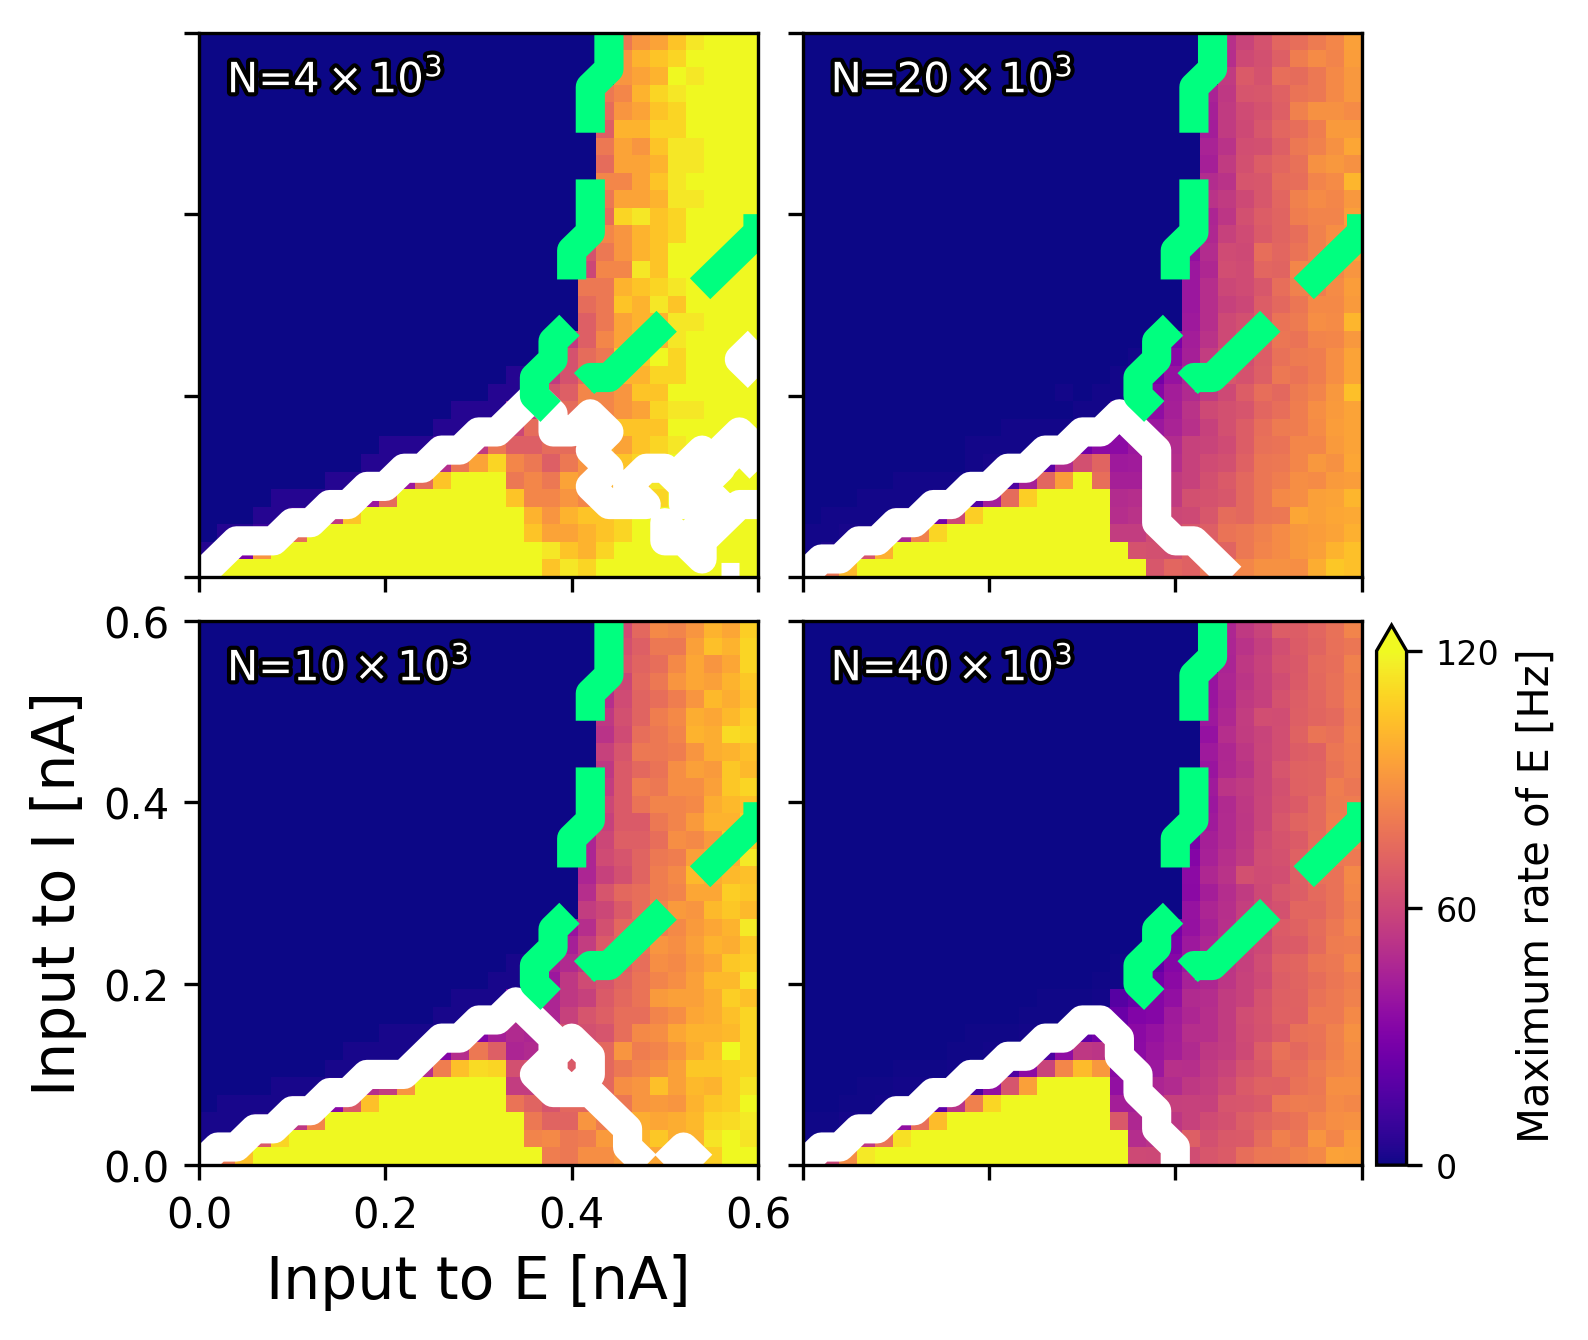

In [205]:
# Plot individually, uncomment last lines to plot, takes a while, can be skipped to next cell
Ns = np.unique(dfResults.N)
fig, axs = plt.subplots(2, 2, figsize=(5, 5), dpi=300)
plt.subplots_adjust(hspace=0.08, wspace=0.08)

for i, N in enumerate(Ns[1:]):
    print(i%2, i/2)
    
    selector = (dfResults.N==N)
    selectedResults = dfResults[selector]
    selectIndices = selectedResults.index
    title = "N=${} \\times 10^3$".format(N*2/1000)
    print(title)
    plotResults(selectedResults, 'max_exc', title=title, ax=axs[i%2, i/2], pos=(i%2, i/2))

    #plotResults(selectedResults, 'domfr_exc')
    #plotResults(selectedResults, 'domfr_power_exc')